* Predicting diabetes with deep learning

In [63]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
# load the dataset

dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')


In [65]:
dataset.shape

(768, 9)

In [66]:
# looks good, the target is in the last column, and the data is all numerical.
# Split into X and y
# here we take the 8 features/labels of the 9 in the dataset.shape and label targets  

X = dataset[:,0:8]
y = dataset[:,8]


In [67]:
# Inspect again : Looks good

X.shape, y.shape

((768, 8), (768,))

In [68]:
# Define the keras model

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid for binary classification    

In [69]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [70]:
# fit the keras model on the data
history = model.fit(X, y, epochs=450, batch_size=10)

Epoch 1/450
77/77 [==============================] - 0s 667us/step - loss: 1.0618 - accuracy: 0.6589
Epoch 2/450
77/77 [==============================] - 0s 604us/step - loss: 0.7961 - accuracy: 0.6602
Epoch 3/450
77/77 [==============================] - 0s 587us/step - loss: 0.7448 - accuracy: 0.6484
Epoch 4/450
77/77 [==============================] - 0s 588us/step - loss: 0.7136 - accuracy: 0.6458
Epoch 5/450
77/77 [==============================] - 0s 644us/step - loss: 0.6815 - accuracy: 0.6523
Epoch 6/450
77/77 [==============================] - 0s 643us/step - loss: 0.6690 - accuracy: 0.6510
Epoch 7/450
77/77 [==============================] - 0s 675us/step - loss: 0.6572 - accuracy: 0.6536
Epoch 8/450
77/77 [==============================] - 0s 924us/step - loss: 0.6374 - accuracy: 0.6628
Epoch 9/450
77/77 [==============================] - 0s 873us/step - loss: 0.6395 - accuracy: 0.6536
Epoch 10/450
77/77 [==============================] - 0s 728us/step - loss: 0.6154 - accura

In [71]:
# Make class prediction with a trained model

predictions = (model.predict(X) > 0.5).astype(int)

24/24 [==============================] - 0s 490us/step


In [83]:
# explore the predictions

for i in range(50):
    print('%s predicted => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] predicted => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] predicted => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] predicted => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] predicted => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] predicted => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] predicted => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] predicted => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] predicted => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] predicted => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] predicted => 1 (expected 1)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] predicted => 0 (expected 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] predicted => 1 (expected 1)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] predicted => 0 (expected 0)
[1

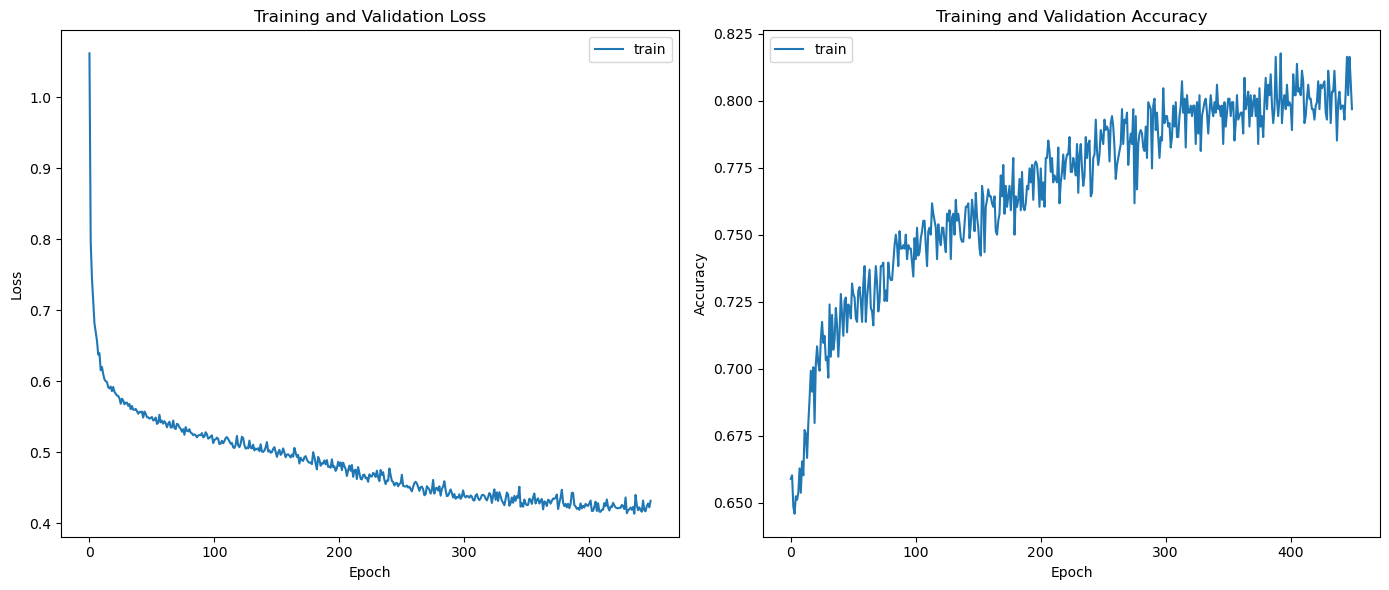

In [82]:

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6), facecolor='w')

# plot the training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

